In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.special as sc
import copy


import sys
sys.path.append('../Modules')
import Image_Fits_Stats
import Visual_analysis

# Preprocessing

In [50]:
def merge_files(Folder,Name_Images,Name_Labels,split_array):
  images=np.load(Folder+Name_Images+'_{}_{}.npy'.format(split_array[0][0],split_array[0][1]))
  labels=pd.read_csv(Folder+Name_Labels+'_{}_{}.csv'.format(split_array[0][0],split_array[0][1]),index_col=0)
  for i,split in enumerate(split_array[1:]):
    start,stop=split
    images_t=np.load(Folder+Name_Images+'_{}_{}.npy'.format(start,stop))
    labels_t=pd.read_csv(Folder+Name_Labels+'_{}_{}.csv'.format(start,stop),index_col=0)

    images=np.append(images,images_t,axis=0)
    labels=labels.append(labels_t)

  return images,labels

In [105]:
split_array=[(0,2000),(2000,4000),(4000,6000),(6000,8000),(8000,10000),(10000,12000),(12000,14000),(14000,16000),(16000,18000),(18000,20000)]

galaxies,df=merge_files('../Data/Filtered data/','Images_Filtered_new','Labels_Filtered_new',split_array)
#df=df.reset_index(drop=True)

#df.to_csv('../Data/Labels_old_Filtered.csv')
#np.save('../Data/Images_old_Filtered.npy',galaxies)

# Overview

In [106]:
df=pd.read_csv('../Data/Labels_old_Filtered.csv',index_col=0)
galaxies=np.load('../Data/Images_old_Filtered.npy')

nonunifomity=np.zeros(len(galaxies))

for i,image in enumerate(galaxies):
    image=copy.deepcopy(image)
    nonunifomity[i]=image.max()/image.mean()


df['NonUniformity']=nonunifomity

#df['SNR_Power']=/np.power(df['Noise_std'],2)
#df=df[np.logical_not(np.isnan(df.Sersic_HLR))]

COSMOS_Sersic_columns=['COSMOS_Sersic_I','COSMOS_Sersic_HLR','COSMOS_Sersic_n','COSMOS_Sersic_q',
                'COSMOS_Sersic_x0','COSMOS_Sersic_y0','COSMOS_Sersic_phi']

df['PSNR']=20*np.log10(df['max_I']/df['Noise_sigma'])
df['log_NU']=10*np.log10(nonunifomity)

In [107]:
import Dataset_overview_filtering as overview

## SNR

19242 Galaxies
PSNR [0.00,inf]


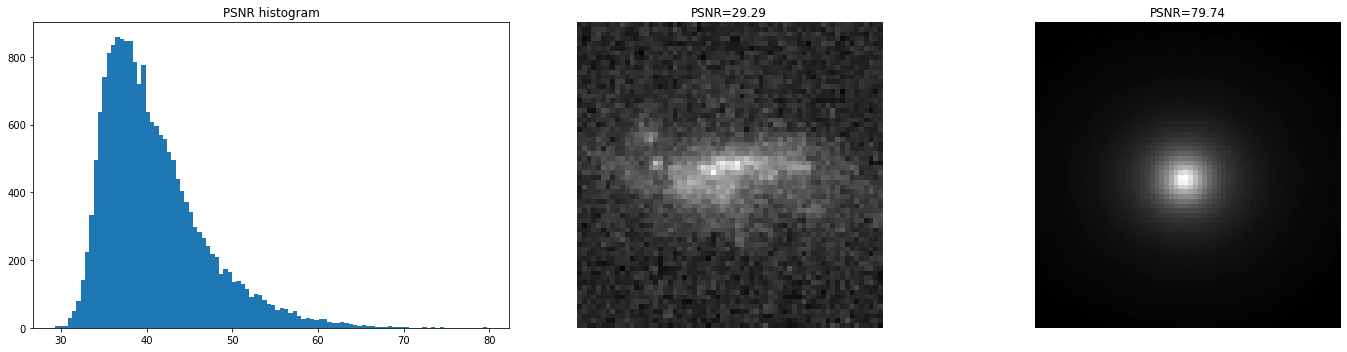

In [8]:
overview.Show_stats(galaxies,df,'PSNR',0,np.inf,2,True,True,False)

PSNR 29.289632951986437
Number of galaxies 19242


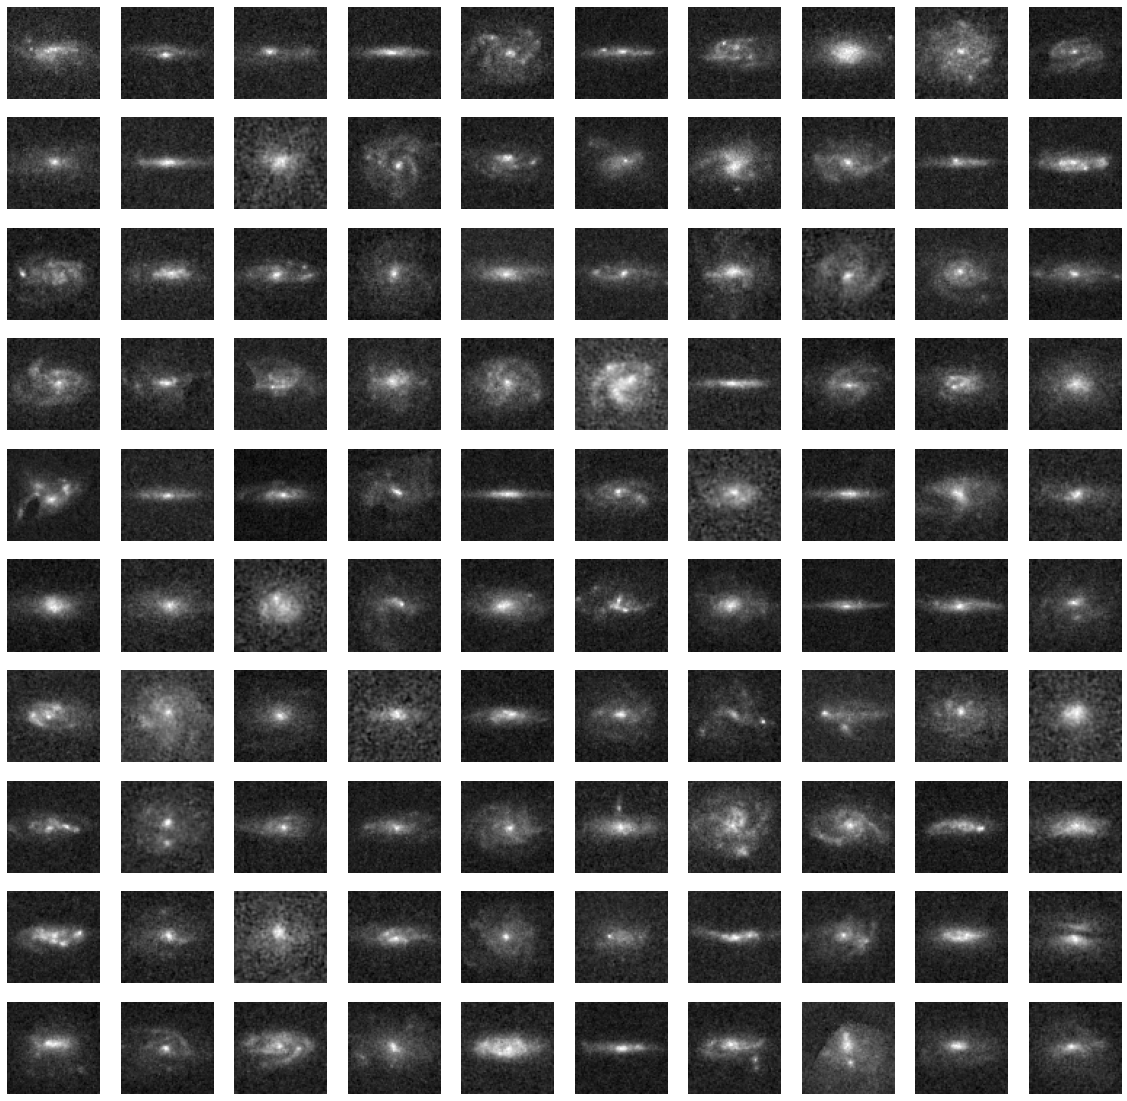

In [7]:
df_filt=overview.Show_filtered(galaxies,df,'PSNR',ascending=True,threshold=0,Index_from=0,invert_colors=True,cut_negatives=False)

PSNR 79.74461451138953
Number of galaxies 19242


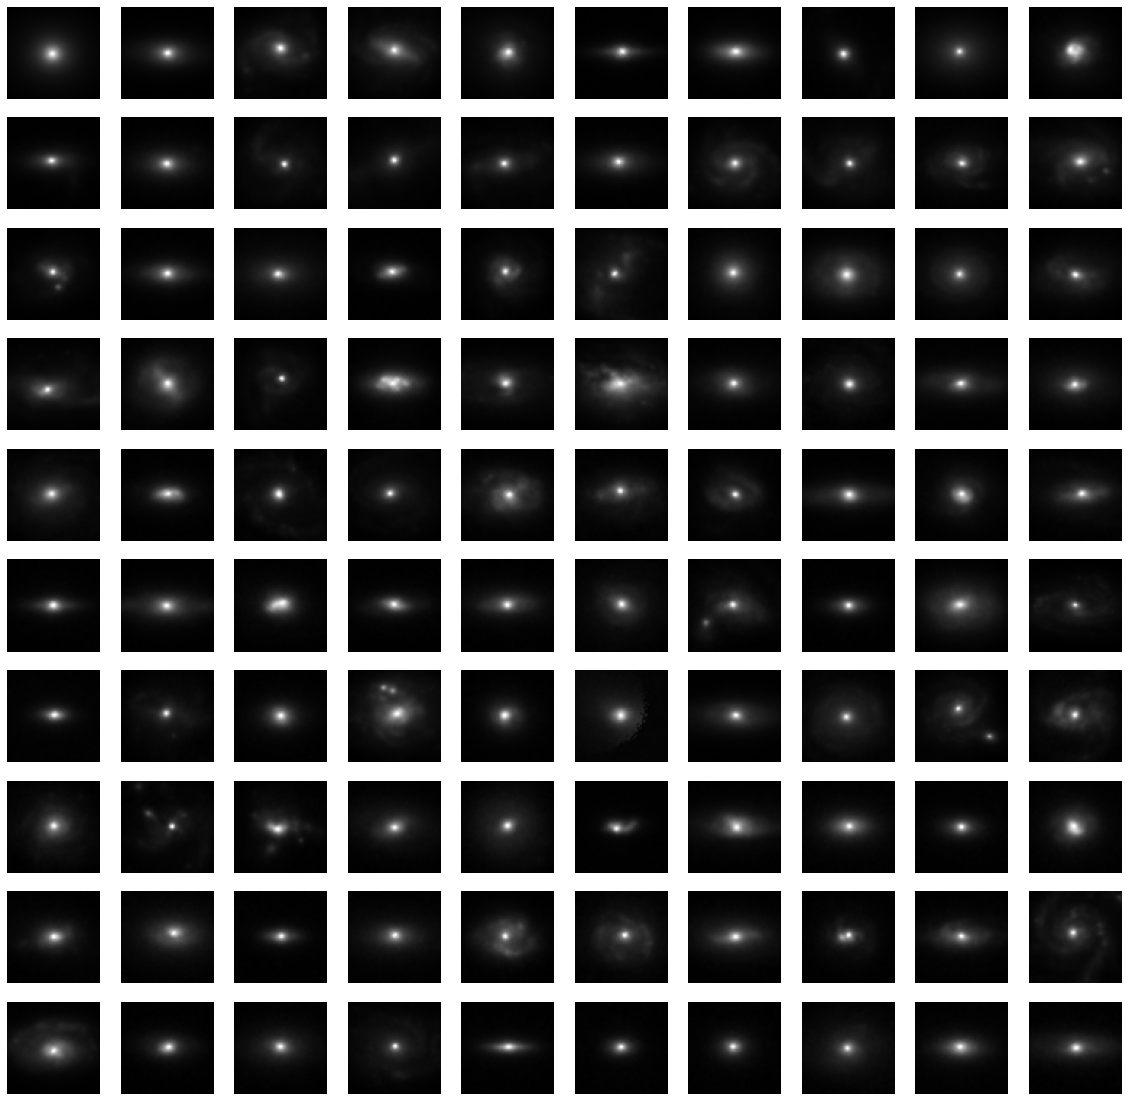

In [9]:
df_filt=overview.Show_filtered(galaxies,df,'PSNR',ascending=False,threshold=0,Index_from=0,invert_colors=True,cut_negatives=False)

## R_cut

19242 Galaxies
R_cut [0.00,100.00]


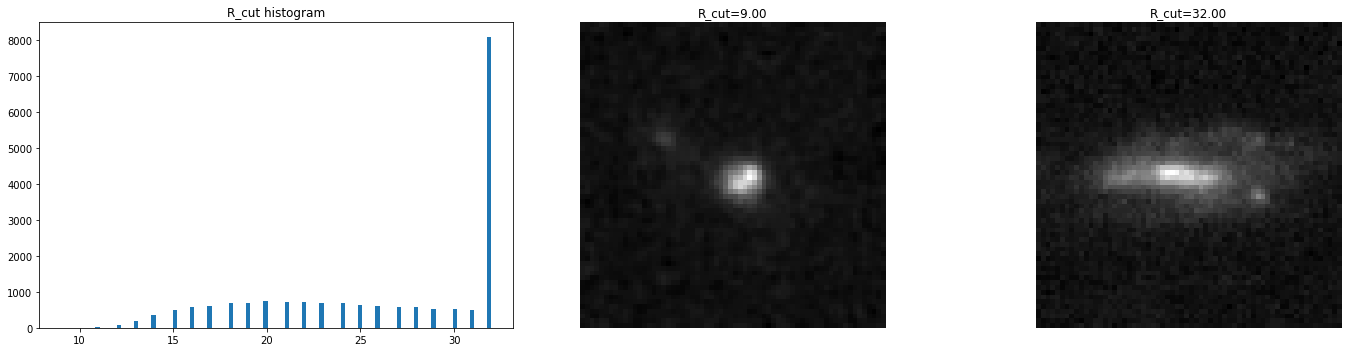

In [10]:
overview.Show_stats(galaxies,df,'R_cut',0,100,2,True,True,False)

R_cut 32.0
Number of galaxies 19242


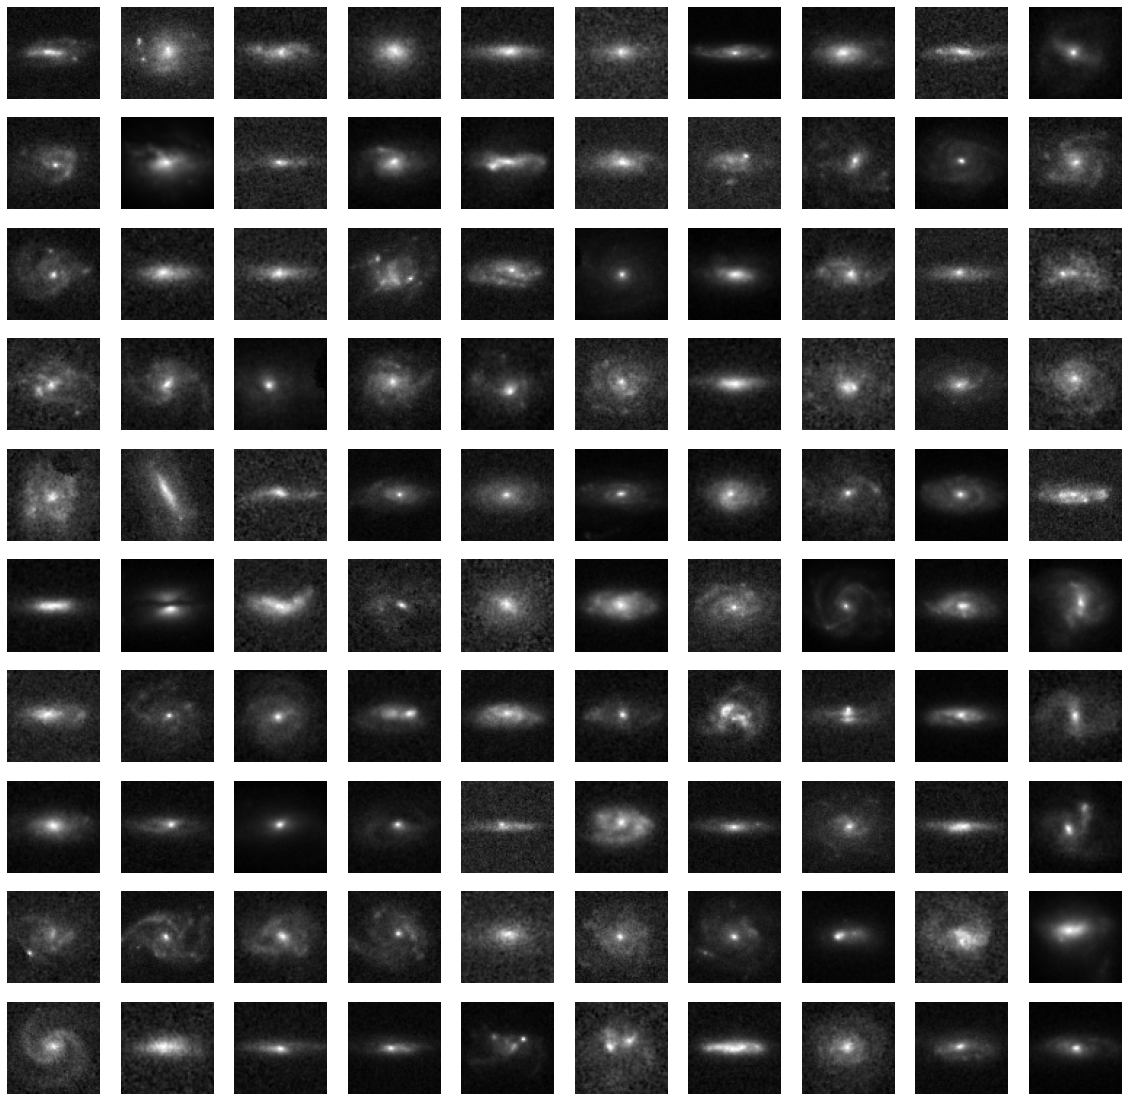

In [11]:
df_filt=overview.Show_filtered(galaxies,df,'R_cut',ascending=False,threshold=0,Index_from=0,invert_colors=True,cut_negatives=False)

R_cut 9.0
Number of galaxies 19242


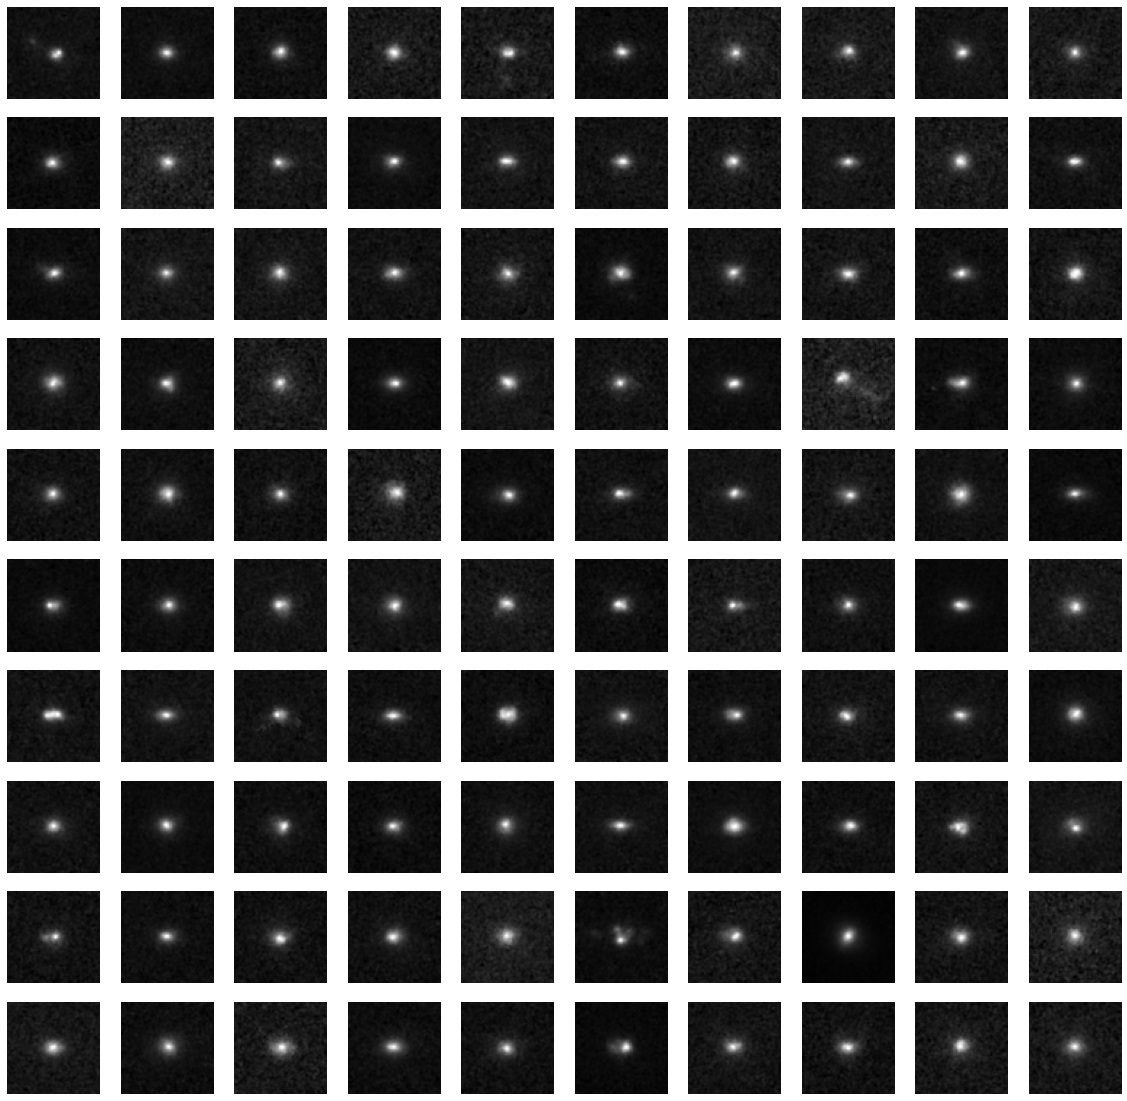

In [12]:
df_filt=overview.Show_filtered(galaxies,df,'R_cut',ascending=True,threshold=0,Index_from=0,invert_colors=True,cut_negatives=False)

## NonUniformity

19242 Galaxies
NonUniformity [0.00,100.00]


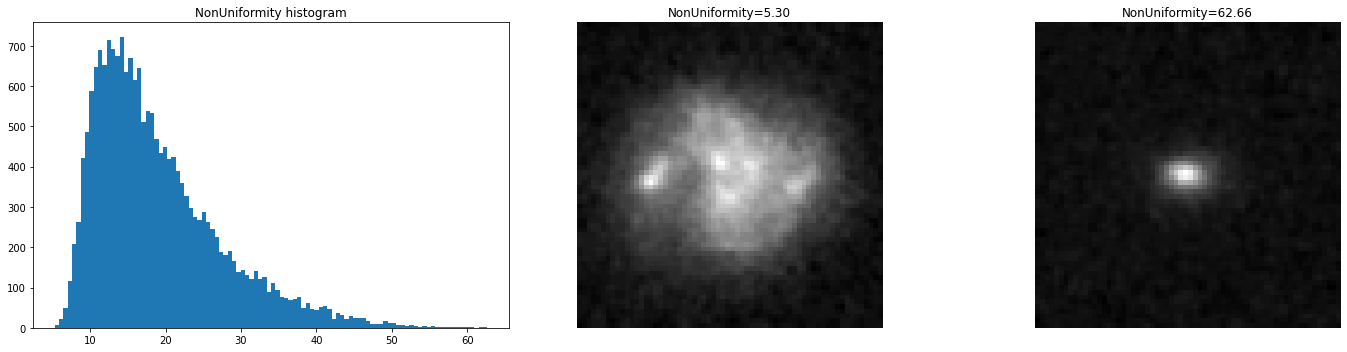

In [13]:
overview.Show_stats(galaxies,df,'NonUniformity',0,100,2,True,True,False)